<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/RECONOCIMIENTO-DE-FORMAS-Y-APRENDIZAJE-COMPUTACIONAL/blob/main/SEMANA%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMANA 10

TEMA 4. ILUMINACIÓN

4.5. Modelos robustos a variaciones de iluminación.

4.5.1 Redes neuronales,

4.5.1 redes neuronales convolucionales

Objetivo:

Analizar modelos y enfoques que permiten entrenar sistemas de visión por computadora más resistentes a las variaciones de iluminación, así como identificar los principales datasets y benchmarks empleados para evaluar su desempeño.

# Guía conceptual: RNN, LSTM y CNN (con fundamentos clave)

## 1) Neuronas y funciones de activación

**Neurona artificial:** recibe un vector **x**, lo combina linealmente con pesos **w** y sesgo **b**, y pasa el resultado por una **función de activación** no lineal:

$$
z = \mathbf{w}^\top \mathbf{x} + b \quad,\quad a = \phi(z)
$$

- **¿Por qué activación?** Sin no linealidad, una red profunda se colapsa a “una sola” combinación lineal.

- **Activaciones comunes:**
  - **ReLU:** $\phi(z)=\max(0,z)$. Rápida y evita saturación positiva.
  - **Leaky ReLU:** como ReLU pero con pendiente pequeña en negativos.
  - **Sigmoide:** $\phi(z)=\frac{1}{1+e^{-z}}$. Útil en salidas probabilísticas (binario), puede saturar.
  - **Tanh:** salida en $[-1,1]$. Centrada en cero; también puede saturar.
  - **Softmax:** convierte un vector en **probabilidades** (clasificación multiclase).

**Capas densas (fully-connected):** apilan neuronas y mezclan **todas** las entradas con **todas** las salidas. Son potentes pero costosas y no explotan estructura espacial/temporal.


---

## 2) Descenso del gradiente (entrenamiento)

Buscamos parámetros \(\theta\) (pesos y sesgos) que minimicen la **función de pérdida** \(\mathcal{L}(\theta)\):

- **Actualización básica:**
  $$
  \theta \leftarrow \theta - \eta \,\nabla_\theta \mathcal{L}
  $$
  (con **tasa de aprendizaje** \(\eta\)).
- **Backpropagation:** usa la **regla de la cadena** para propagar gradientes capa por capa.
- **Optimizadores:** Adam, SGD con momentum, RMSProp → estabilizan y aceleran el aprendizaje.
- **Regularización:** Dropout, weight decay, early stopping → evitan sobreajuste.

---

## 3) CNN (Convolutional Neural Networks)

**Problema que resuelven:** datos **espaciales** (imágenes). Buscan **patrones locales** (bordes, texturas) con filtros compartidos.

### 3.1 Convolución 2D (intuición)

- Un **filtro** (kernel) pequeño (p. ej. 3×3) “se desliza” sobre la imagen.
- En cada posición, calcula una **suma ponderada** local.
- **Pesos compartidos** → el mismo filtro detecta el mismo patrón en toda la imagen.
- **Parámetros clave:** tamaño del kernel, *stride* (paso), *padding* (relleno).

### 3.2 Bloques típicos en CNN

- **Conv → Activación (ReLU) → Pooling** (reduce resolución conservando lo importante).
- **BatchNorm/GroupNorm**: estabilizan activaciones y aceleran entrenamiento.
- **Global Average Pooling** al final: colapsa mapas de activación a un vector.
- **Capa densa + softmax**: predicción final de clases.

### 3.3 ¿Por qué CNN >> RNN en imágenes?

- **Invariancia traslacional:** un perro a la izquierda o derecha activa filtros similares.
- **Parámetros compartidos:** menos pesos, mejor generalización.
- **Jerarquía de rasgos:** bordes → texturas → partes → objeto completo.

---

## 4) RNN (Recurrent Neural Networks)

**Problema que resuelven:** datos **secuenciales** (texto, audio, series de tiempo). Mantienen un **estado** con memoria del pasado.

### 4.1 RNN simple (intuición)

A cada paso temporal \(t\):

$$
\mathbf{h}_t = \phi\big(W_x \mathbf{x}_t + W_h \mathbf{h}_{t-1} + \mathbf{b}\big)
$$

- **\(\mathbf{h}_t\)**: estado oculto que resume la secuencia hasta \(t\).
- **Claves:** puede sufrir **desvanecimiento/explosión** del gradiente en secuencias largas.

### 4.2 LSTM (Long Short-Term Memory)

Diseñada para **recordar/olvidar** información relevante y mitigar problemas de gradiente.

- Mantiene un **estado de celda** \(\mathbf{c}_t\) (memoria de largo plazo).
- Usa **puertas** (valvulitas con sigmoide) para controlar el flujo:
  - **Olvido** \(f_t\): cuánto del pasado conservar.
  - **Entrada** \(i_t\): cuánto de lo nuevo escribir.
  - **Salida** \(o_t\): cuánto exponer como estado oculto.
- Intuición: “libreta con pestañas” para recordar lo importante a lo largo del tiempo.

### 4.3 ¿Cuándo RNN/LSTM?

- Texto (NLP), audio/voz, **series de tiempo**, sensores, y **video** (si se procesa frame a frame).
- Para **imágenes estáticas**, las RNN suelen rendir peor que CNN.

---

## 5) Convoluciones vs. Recurrencia (visión general)

| Aspecto            | CNN                         | RNN/LSTM                          |
|--------------------|-----------------------------|----------------------------------|
| Datos              | Espaciales (imágenes)       | Secuenciales (tiempo, texto)     |
| Parámetros         | Compartidos espacialmente    | Compartidos temporalmente         |
| Ventaja            | Detecta patrones locales e invariancias | Modela dependencias temporales/contexto |
| Limitaciones       | Menos adecuadas para largo plazo temporal (salvo 3D/temporal conv) | Difíciles para estructura 2D pura |

---


https://playground.tensorflow.org/


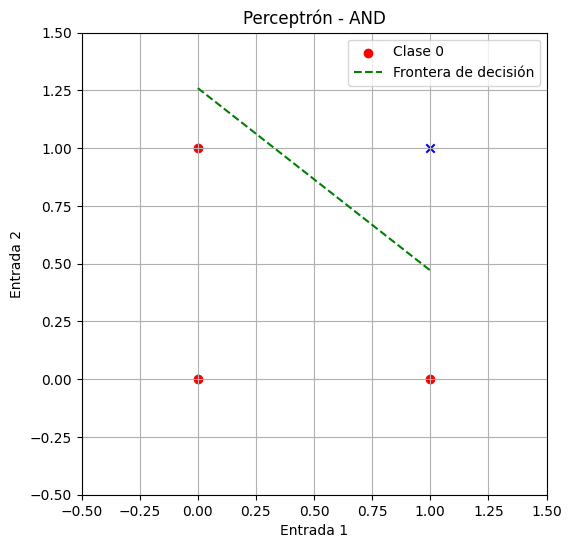

Pesos finales: [0.2488135  0.31518937]
Bias final: -0.3972366239283561

Evaluación del perceptrón:
Entrada: [0 0] => Salida: 0
Entrada: [0 1] => Salida: 0
Entrada: [1 0] => Salida: 0
Entrada: [1 1] => Salida: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Entradas y salidas
# -------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Salidas deseadas
Y_and = np.array([0, 0, 0, 1])  # AND
Y_or  = np.array([0, 1, 1, 1])  # OR

# Elegir función a entrenar
Y = Y_and  # Cambia a Y_or para OR

# -------------------------
# Inicialización
# -------------------------
np.random.seed(0)
weights = np.random.rand(2)
bias = np.random.rand()
learning_rate = 0.1
epochs = 10

# -------------------------
# Función de activación
# -------------------------
def activation(x):
    return 1 if x >= 0 else 0

# -------------------------
# Entrenamiento del perceptrón
# -------------------------
for epoch in range(epochs):
    for i in range(len(X)):
        x_i = X[i]
        target = Y[i]

        z = np.dot(x_i, weights) + bias
        output = activation(z)
        error = target - output

        # Actualizar pesos y bias
        weights += learning_rate * error * x_i
        bias += learning_rate * error

# -------------------------
# Gráfico de resultados
# -------------------------

# Función para dibujar la línea de decisión
def plot_decision_boundary(weights, bias, X, Y, title=""):
    plt.figure(figsize=(6, 6))

    # Puntos
    for i in range(len(X)):
        if Y[i] == 0:
            plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Clase 0' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', marker='x', label='Clase 1' if i == 1 else "")

    # Línea de decisión: w1*x + w2*y + b = 0 → y = -(w1*x + b)/w2
    x_vals = np.array([0, 1])
    if weights[1] != 0:
        y_vals = -(weights[0] * x_vals + bias) / weights[1]
        plt.plot(x_vals, y_vals, '--', label='Frontera de decisión', color='green')
    else:
        # Evita división por cero (raro en este caso)
        plt.axvline(-bias / weights[0], color='green', linestyle='--', label='Frontera de decisión')

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.title(f"Perceptrón - {title}")
    plt.xlabel("Entrada 1")
    plt.ylabel("Entrada 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Mostrar resultados
plot_decision_boundary(weights, bias, X, Y, title="AND" if np.array_equal(Y, Y_and) else "OR")

# Imprimir evaluación final
print("Pesos finales:", weights)
print("Bias final:", bias)
print("\nEvaluación del perceptrón:")

for x in X:
    result = activation(np.dot(x, weights) + bias)
    print(f"Entrada: {x} => Salida: {result}")


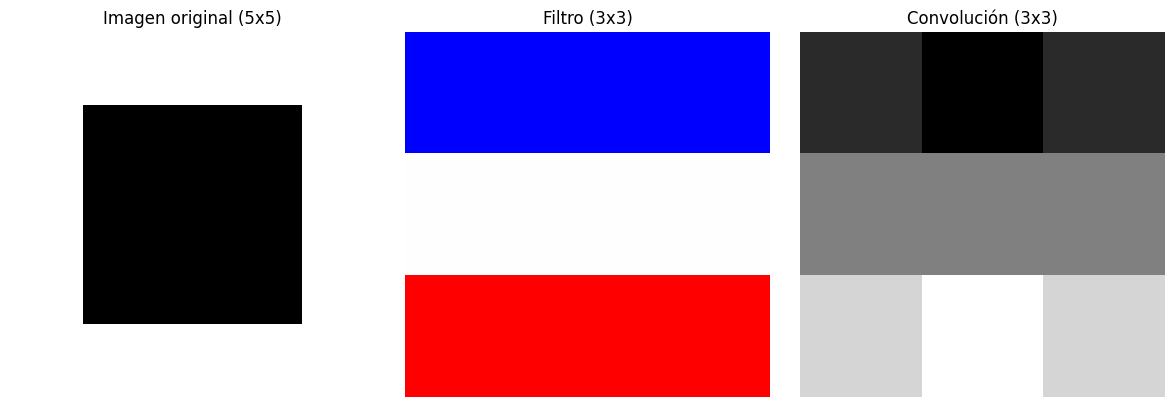

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Imagen 5x5: borde blanco (1), centro oscuro (0)
image = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1]
])

# Filtro (kernel) que detecta bordes horizontales
kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

# Aplicar convolución (sin padding, stride 1)
output = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        region = image[i:i+3, j:j+3]
        output[i, j] = np.sum(region * kernel)

# Mostrar la imagen original, filtro, y salida
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Imagen original (5x5)')
axs[0].axis('off')

axs[1].imshow(kernel, cmap='bwr', vmin=-1, vmax=1)
axs[1].set_title('Filtro (3x3)')
axs[1].axis('off')

axs[2].imshow(output, cmap='gray')
axs[2].set_title('Convolución (3x3)')
axs[2].axis('off')

plt.tight_layout()
plt.show()


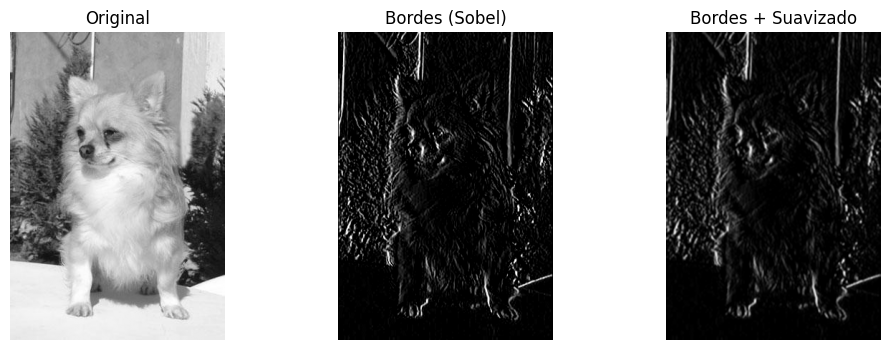

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen (grayscale para simplificar)
img = cv2.imread('/content/n02085620_199.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro 1: detector de bordes (Sobel horizontal)
kernel_edge = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Filtro 2: suavizado (blur simple)
kernel_blur = np.ones((3,3), np.float32) / 9

# Aplicar convolución 1
img_edge = cv2.filter2D(img, -1, kernel_edge)

# Aplicar convolución 2 (al resultado anterior)
img_blur = cv2.filter2D(img_edge, -1, kernel_blur)

# Mostrar imágenes
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Bordes (Sobel)')
plt.imshow(img_edge, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Bordes + Suavizado')
plt.imshow(img_blur, cmap='gray')
plt.axis('off')

plt.show()


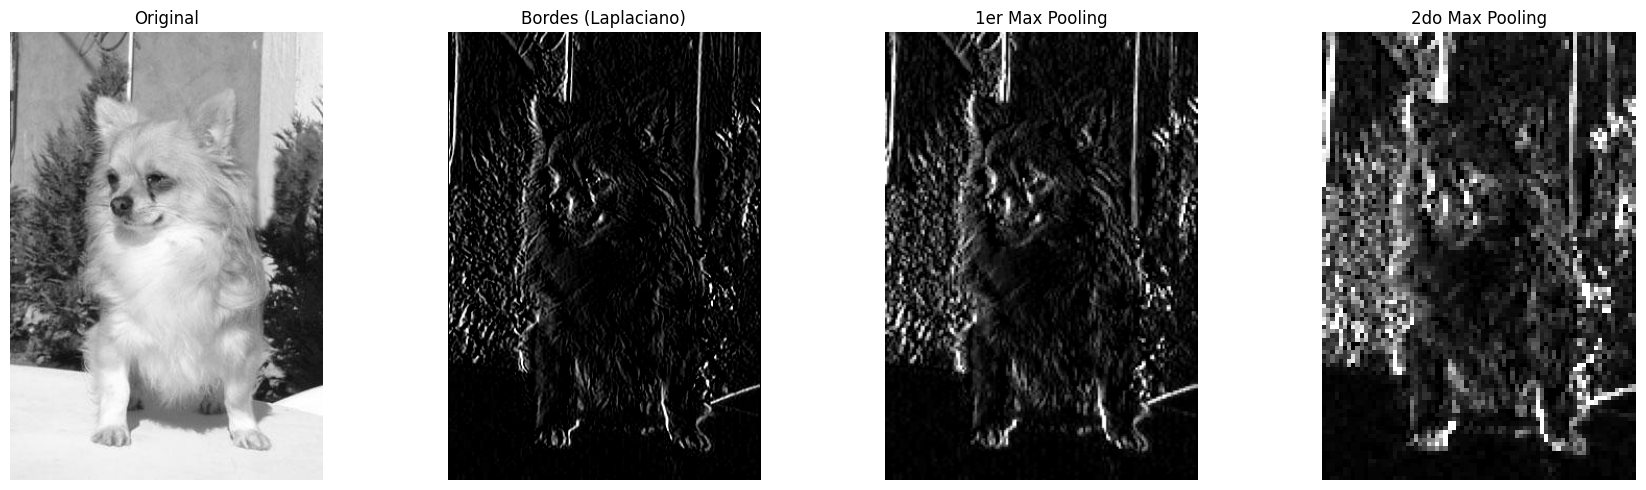

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('/content/n02085620_199.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro Laplaciano para detectar bordes
kernel_edge = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

img_edge = cv2.filter2D(img, -1, kernel_edge)

# ----------- Max Pooling manual (2x2 con stride 2) -----------
def max_pooling(img, size=2, stride=2):
    h, w = img.shape
    out_h = h // stride
    out_w = w // stride
    pooled = np.zeros((out_h, out_w), dtype=img.dtype)

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            patch = img[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(patch)

    return pooled

# Primer max pooling
img_pooled1 = max_pooling(img_edge, size=2, stride=2)

# Segundo max pooling (aplicado al resultado del primero)
img_pooled2 = max_pooling(img_pooled1, size=2, stride=2)

# ----------- Mostrar imágenes -----------
plt.figure(figsize=(18,5))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Bordes (Laplaciano)')
plt.imshow(img_edge, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('1er Max Pooling')
plt.imshow(img_pooled1, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('2do Max Pooling')
plt.imshow(img_pooled2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


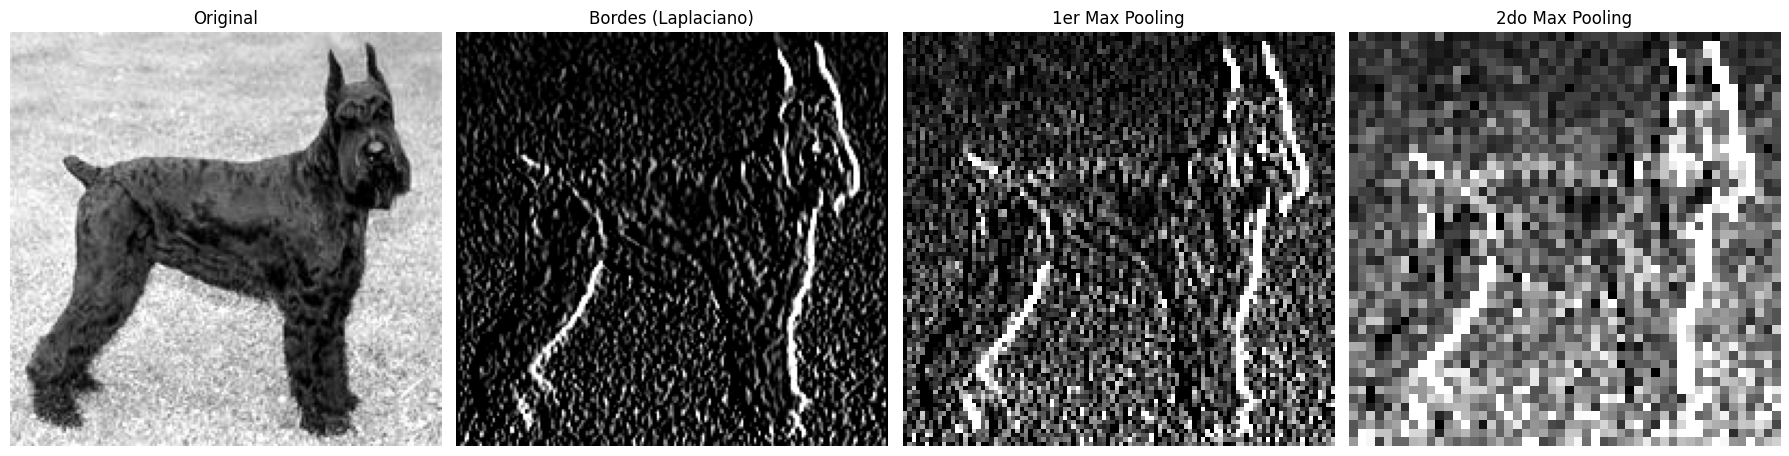

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('/content/n02097130_572.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro Laplaciano para detectar bordes
kernel_edge = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

img_edge = cv2.filter2D(img, -1, kernel_edge)

# ----------- Max Pooling manual (2x2 con stride 2) -----------
def max_pooling(img, size=2, stride=2):
    h, w = img.shape
    out_h = h // stride
    out_w = w // stride
    pooled = np.zeros((out_h, out_w), dtype=img.dtype)

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            patch = img[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(patch)

    return pooled

# Primer max pooling
img_pooled1 = max_pooling(img_edge, size=2, stride=2)

# Segundo max pooling (aplicado al resultado del primero)
img_pooled2 = max_pooling(img_pooled1, size=2, stride=2)

# ----------- Mostrar imágenes -----------
plt.figure(figsize=(18,5))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Bordes (Laplaciano)')
plt.imshow(img_edge, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('1er Max Pooling')
plt.imshow(img_pooled1, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('2do Max Pooling')
plt.imshow(img_pooled2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Videos de Interés sobre Redes Neuronales y Aprendizaje Profundo

1. **¿Qué es una Red Neuronal? | Aprendizaje Profundo. Capítulo 1**  
   [https://youtu.be/jKCQsndqEGQ?si=e0Jpk2UuBPZ1u9Nd](https://youtu.be/jKCQsndqEGQ?si=e0Jpk2UuBPZ1u9Nd)

2. **Descenso de Gradiente. Cómo Aprenden las Redes Neuronales | Aprendizaje Profundo. Capítulo 2**  
   [https://youtu.be/mwHiaTrQOiI?si=b7ubWRYpO08cTT3n](https://youtu.be/mwHiaTrQOiI?si=b7ubWRYpO08cTT3n)

3. **Cómo funcionan las redes neuronales - Inteligencia Artificial**  
   [https://youtu.be/CU24iC3grq8?si=xo_65RUhY0v0_qiM](https://youtu.be/CU24iC3grq8?si=xo_65RUhY0v0_qiM)

4. **¡Redes Neuronales CONVOLUCIONALES! ¿Cómo funcionan?**  
   [https://youtu.be/V8j1oENVz00?si=lX5Clcrzp4s1vNFA](https://youtu.be/V8j1oENVz00?si=lX5Clcrzp4s1vNFA)

5. **But what is a convolution?**  
   [https://youtu.be/KuXjwB4LzSA?si=pfa9NgxWR0QdUvZ7](https://youtu.be/KuXjwB4LzSA?si=pfa9NgxWR0QdUvZ7)

6. **Descifrando el Misterio: Redes Neuronales Convolucionales (CNNs) con Python y Tensorflow**  
   [https://youtu.be/zBqnWfTwCgc?si=Vb7l7jDLTLLbGmkS](https://youtu.be/zBqnWfTwCgc?si=Vb7l7jDLTLLbGmkS)
